In [86]:
# Import required packages for prediction using SVM
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [87]:
dataset1 = '2-wayEpi_100feat.txt'
dataset2 = '4-wayAdditive_100feat.txt'
dataset3 = '2Additive_2-wayEpi_100feat.txt'
dataset4 = '4-wayHeterogeneous_100feat.txt'

In [88]:
dataset = dataset1
df = pd.read_csv(dataset, sep='\t')

In [89]:
# Setup the data 
df = df.dropna()
X = df.drop(columns=['Class'])
y = df['Class']
df.head()

,N0,N1,N2,N3,N4,N5,N6,N7,N8,N9,...,N91,N92,N93,N94,N95,N96,N97,M0P1,M0P2,Class
0,0,0,0,0,2,0,1,1,0,2,...,1,1,1,1,0,0,0,0,0,1
1,1,0,0,1,0,1,1,0,0,1,...,0,1,1,0,0,0,0,0,0,1
2,0,1,0,2,0,1,0,0,0,0,...,0,1,1,1,0,1,2,0,0,1
3,2,1,0,2,1,0,0,1,0,0,...,0,0,2,0,0,0,1,0,0,1
4,1,0,0,0,2,0,0,0,1,1,...,0,1,0,0,0,0,1,0,0,1


In [90]:
# Split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Class distribution
Class
1    500
0    500
Name: count, dtype: int64


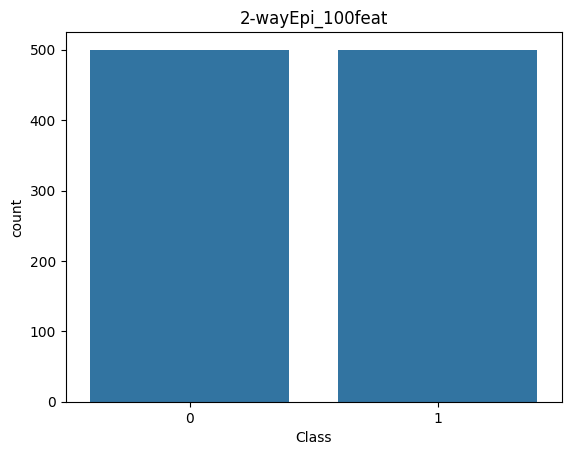

In [91]:
# Check for data imbalance
print('Class distribution')
print(y.value_counts())

# Plot the data
sns.countplot(x='Class', data=df)
plt.title(dataset[:-4])
plt.show()

In [92]:
# Print feature if it has missing values else print None
print('Features with missing values:')
if X.isnull().sum().any():
    print(X.columns[X.isnull().sum() > 0])
else:
    print('None')


Features with missing values:
None


In [93]:
# Training a SVM model with linear kernel 
clf = SVC(kernel='linear', probability=True)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.505
Confusion Matrix:
[[54 50]
 [49 47]]


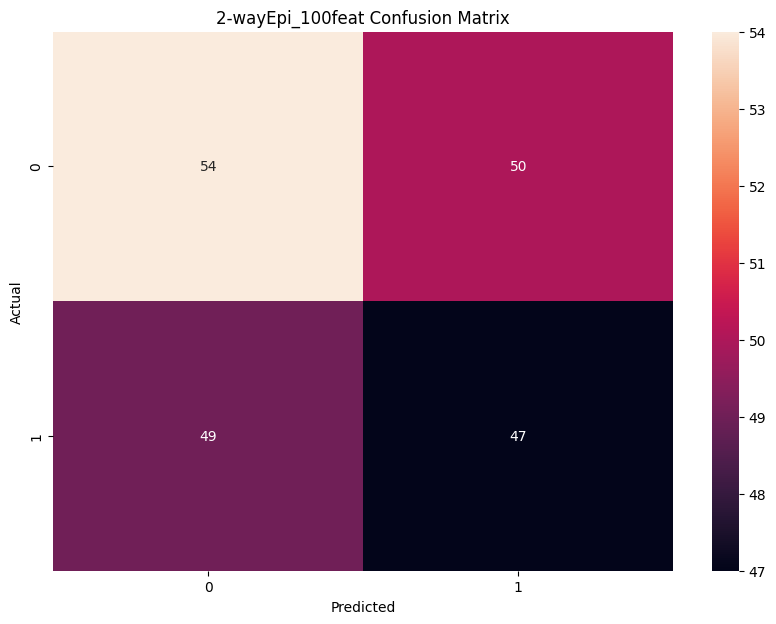

In [94]:
# Draw confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred) 
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(dataset[:-4] + ' Confusion Matrix')
plt.show()


In [95]:
# Classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.52      0.52      0.52       104
           1       0.48      0.49      0.49        96

    accuracy                           0.51       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.51      0.51      0.51       200

